Sentiment analysis is a type of natural language processing problem that determines the sentiment or emotion of a piece of text. For example, an algorithm could be constructed to classify whether a product’s review was positive, neutral, or negative. Natural language processing (NLP) is a field of artificial intelligence that involves computers understanding and processing human language. The goal is often to derive meaning from text.

In [138]:
import pandas
import numpy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
Tweet= pandas.read_csv("Tweets.csv")#importing data

Our dataset is called “Twitter US Airline Sentiment” which was downloaded from Kaggle as a csv file. Its original source was from Crowdflower’s Data for Everyone library. Tweets were scraped from Twitter in February 2015 about each major US airline. Contributors then classified each tweet as either “positive”, “neutral”, or “negative” and cited the reason for a negative classification as well as a confidence score for the assigned label.

In [140]:
#exploratory data analysis

In [141]:
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


The first step should be to check the shape of the dataframe and then check the number of null values in each column.In this way we can get an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.

In [142]:
print("Shape of the dataframe is",Tweet.shape)
print("The number of nulls in each column are \n", Tweet.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


To get a better idea, lets calculate the percentage of nulls or NA values in each column

In [143]:
print("Percentage null or na values in df")
((Tweet.isnull() | Tweet.isna()).sum() * 100 / Tweet.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data.We will remove these columns.

In [144]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

we can look at the counts for each sentiment label. We note that there are more negative tweets than both positive and neutral combined. We can potentially infer that people are more likely to be vocal on social media platforms, such as Twitter, when something goes wrong with their flight as opposed to when nothing unexpected happens.

In [145]:
#analysing semtiments
sentiments=Tweet['airline_sentiment'].value_counts()
sentiments.head()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

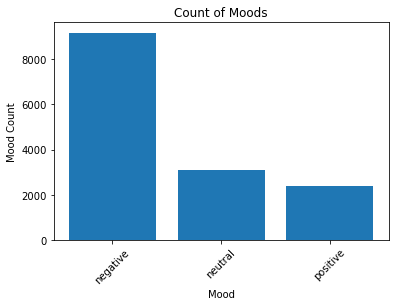

In [146]:
Index = [1,2,3]
plt.bar(Index,sentiments)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [147]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

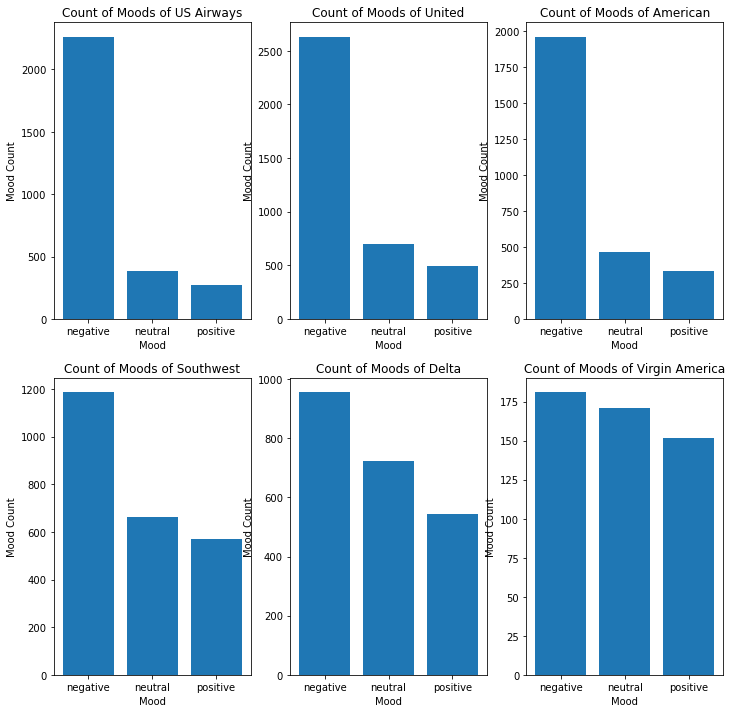

In [148]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of moods of airlines are always skewed toward negative moods. 

In [149]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [150]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [151]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

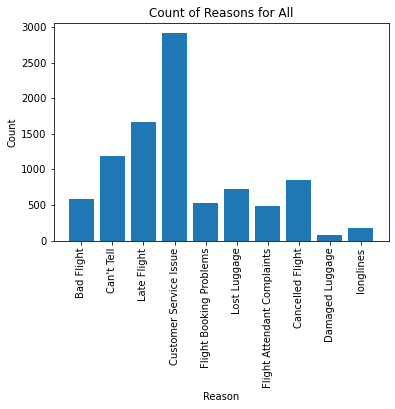

In [152]:
plot_reason('All')

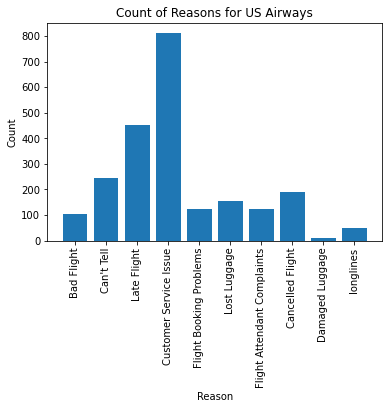

In [153]:
plot_reason('US Airways')

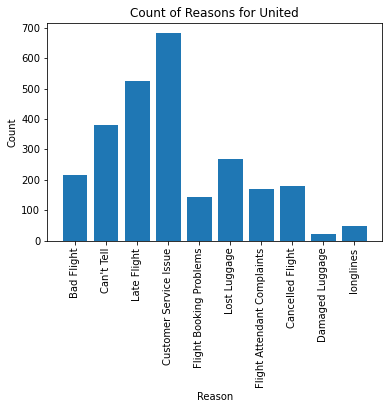

In [154]:
plot_reason('United')

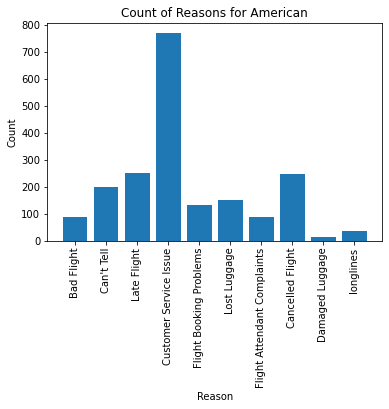

In [155]:
plot_reason('American')

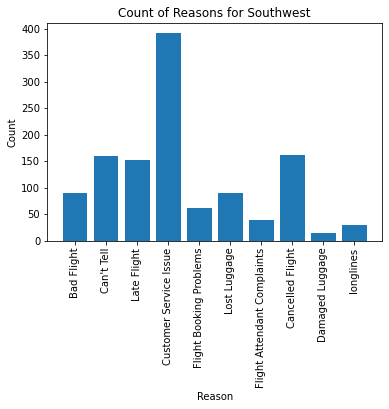

In [156]:
plot_reason('Southwest')

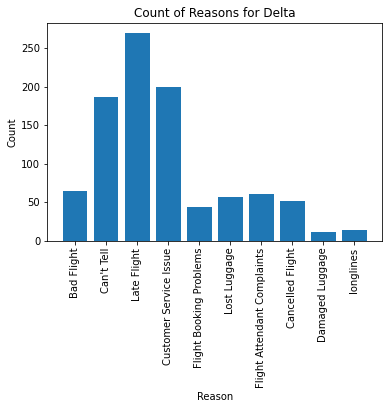

In [157]:
plot_reason('Delta')

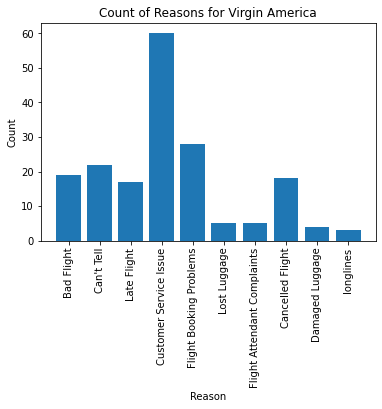

In [158]:
plot_reason('Virgin America')

In [159]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


To better understand the difference in sentiments for positive, neutral, and negative tweets, we can create a word cloud for each category. Before we create this word cloud, we must clean the tweets by removing twitter handles, special characters, numbers, punctuation, and small words that are 3 characters or less. This allows us to see words that are representative for each sentiment as opposed to words that are likely seen across each label. 

In [160]:
from wordcloud import WordCloud,STOPWORDS

In [161]:
df_neg=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df_neg['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [162]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

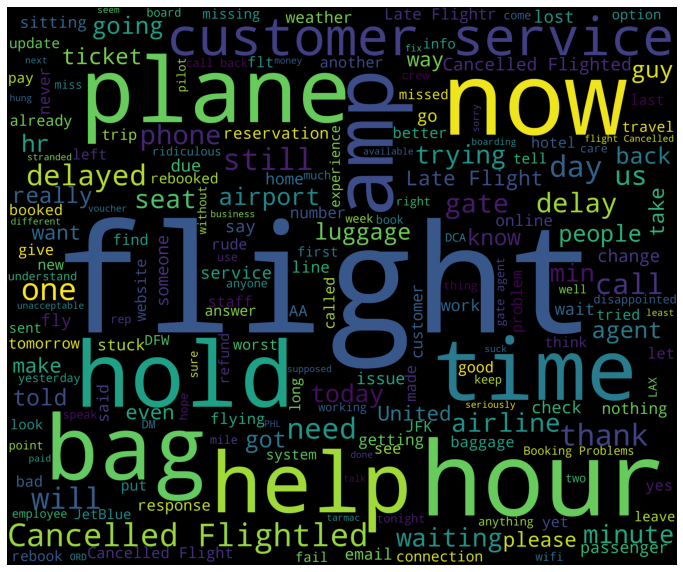

In [163]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

 Word Cloud for the positive Tweets

In [167]:
df_pos=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(df_pos['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [168]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

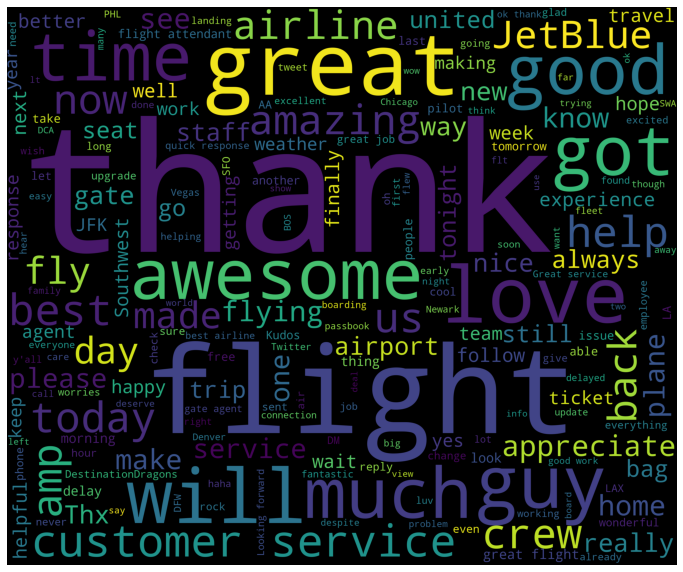

In [169]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for the neutral Tweets

In [170]:
df_neu=Tweet[Tweet['airline_sentiment']=='neutral']
words = ' '.join(df_neu['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [171]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

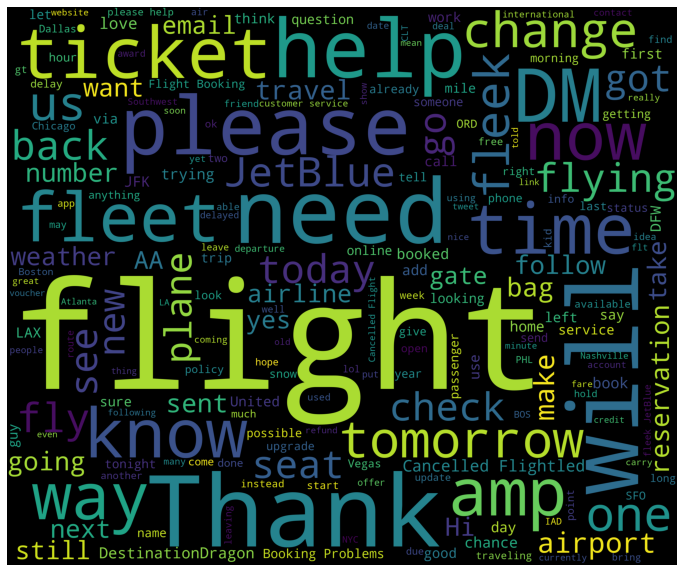

In [172]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Text preprocessing

In [173]:
import re
import nltk
from nltk.corpus import stopwords

In [174]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) #extracting letters
    words = letters_only.lower().split()  #converting to lower case                           
    stops = set(stopwords.words("english"))      #stopwords            
    meaningful_words = [w for w in words if not w in stops] #removing stopwords
    return( " ".join( meaningful_words )) 

In [175]:
 from sklearn.model_selection import train_test_split

In [176]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))


In [177]:
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [178]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")#Convert a collection of text documents to a matrix of token counts
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [180]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [181]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [182]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifieris 0.6772540983606558
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      1852
     neutral       0.43      0.39      0.41       633
    positive       0.56      0.58      0.57       443

    accuracy                           0.68      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.67      0.68      0.67      2928



<Figure size 432x288 with 0 Axes>

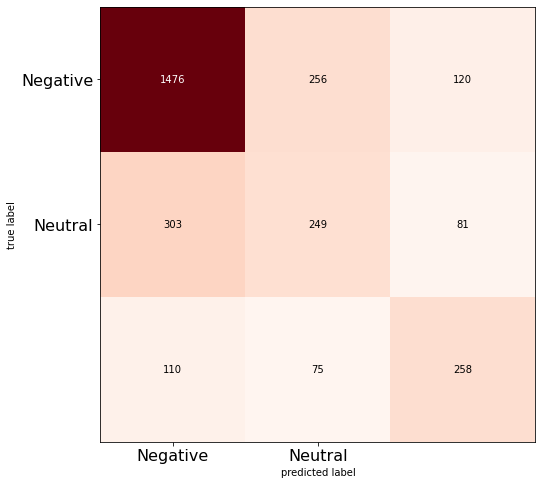

Accuracy of RandomForestClassifieris 0.7667349726775956
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2104
     neutral       0.44      0.57      0.50       447
    positive       0.60      0.73      0.66       377

    accuracy                           0.77      2928
   macro avg       0.65      0.71      0.67      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 432x288 with 0 Axes>

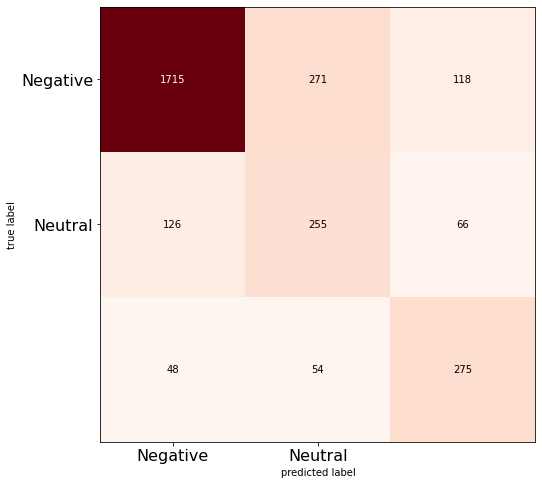

In [183]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()